In [2]:
import sympy

In [3]:
sympy.init_printing()

In [4]:
x, t = sympy.symbols('x t')
T = sympy.Function('T')
kappa = sympy.symbols('kappa', positive=True)
tau_q = sympy.symbols('tau_q', positive=True)
eta, V = sympy.symbols('eta V')
#V = 0

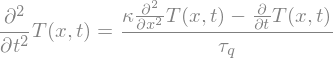

In [5]:
CattaneoSingle = sympy.Eq(T(x,t).diff(t, 2), (1/tau_q)*(kappa*T(x,t).diff(x,2) - T(x,t).diff(t)))
CattaneoSingle

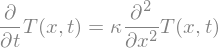

In [6]:
toyheatCElimit = sympy.Eq(T(x,t).diff(t), kappa*T(x,t).diff(x,2))
toyheatCElimit

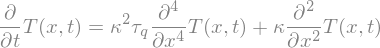

In [7]:
toyheatCE = sympy.Eq(T(x,t).diff(t), kappa*T(x,t).diff(x,2) + kappa**2*tau_q*T(x,t).diff(x,4))
toyheatCE

In [8]:
"Take toyheatCE and make spreading wave substitution"

'Take toyheatCE and make spreading wave substitution'

"Take toyheatCE and substitute eta expression"

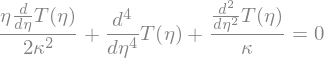

In [9]:
CE_in_eta = sympy.Eq(T(eta).diff(eta,4) + (1 / kappa)*T(eta).diff(eta,2) + eta / (2 * kappa**2) * T(eta).diff(eta), 0)
CE_in_eta

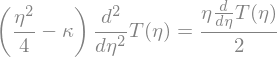

In [10]:
Cat_in_eta = sympy.Eq((eta**2/4 - kappa)*T(eta).diff(eta,2), (eta/2)*T(eta).diff(eta))
Cat_in_eta

In [11]:
# sympy.dsolve(CE_in_eta, T(eta), ics={T(-sympy.oo): -1, T(sympy.oo): 1,
#                                     T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

In [12]:
# sympy.dsolve(Cat_in_eta, T(eta), ics={T(-sympy.oo): -1, T(sympy.oo): 1,
#                                     T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

In [13]:
"Cannot solve neither Cattaneo nor CE for spreading wave ansatz. Now try with travelling wave ansatz"

'Cannot solve neither Cattaneo nor CE for spreading wave ansatz. Now try with travelling wave ansatz'

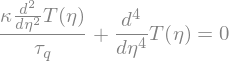

In [14]:
V = 0 
CE_in_V = sympy.Eq(T(eta).diff(eta,4) + (kappa / tau_q)*T(eta).diff(eta,2) + (V*kappa / tau_q)*T(eta).diff(eta), 0)
CE_in_V

In [15]:
sympy.dsolve(CE_in_V, T(eta), ics={T(-sympy.oo): -1, T(sympy.oo): 1,
                                    T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

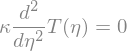

In [16]:
V = 0 
Cat_in_V = sympy.Eq((kappa - tau_q*V)*T(eta).diff(eta,2) + V*kappa*T(eta).diff(eta), 0)
Cat_in_V

In [18]:
sympy.dsolve(Cat_in_V, T(eta), ics={T(-sympy.oo): -1, T(sympy.oo): 1,
                                    T(eta).diff(eta).subs(eta,-sympy.oo) : 0, T(eta).diff(eta).subs(eta,sympy.oo) : 0})

ValueError: Couldn't solve for initial conditions

In [17]:
def fprime(u):
    return 0
def fprime_inv(v):
    return v
def shooting_rhs(x, q, V, direction):
    u, du = q
    dqdx = np.zeros_like(q)
    dqdx[0] = du
    dqdx[1] = direction * (fprime(u) - V) * du
    return dqdx